In [2]:
import pandas as pd
from glob import glob
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [24]:
dfs = [pd.read_csv(file, sep='\t', header=0) for file in glob('/Users/rbdurfee/Downloads/2017 Ford F150 Ecoboost/Extended Data Set/* Test Data.txt')]

df = pd.concat(dfs, sort=False)
df = df.dropna(axis='index', how='any')

In [25]:
df = df.drop(['Dyno_Spd[mph]',
 'Dyno_Spd_Front[mph]',
 'Dyno_Spd_Rear[mph]',
 'Drive_Trace_Schedule[mph]',
 'Veh_wheel_spd_R1_CAN[]',
 'Veh_wheel_spd_R2_CAN[]',
 'Veh_wheel_spd_F1_CAN[]',
 'Veh_wheel_spd_F2_CAN[]',
 'Veh_speed_PCM[mph]',
 'Veh_speed_high_res_TCM[kph]'], axis=1)

In [26]:
X = df.values

X = StandardScaler().fit_transform(X)

In [27]:
pca = PCA(n_components=20)

principalComponents = pca.fit_transform(X)

<IPython.core.display.Javascript object>


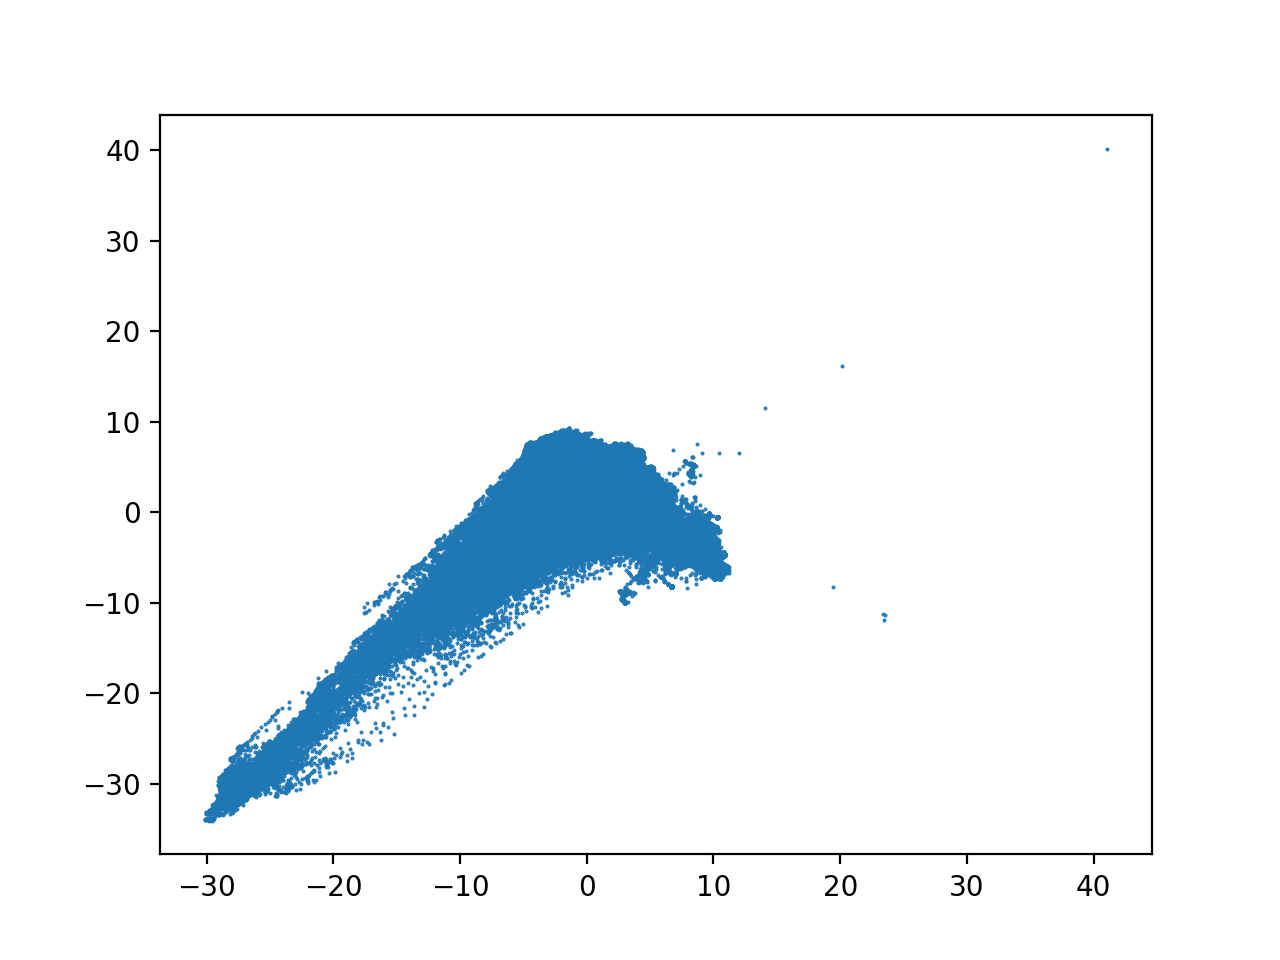

In [28]:
_, ax = plt.subplots()

ax.scatter(principalComponents[:, 0], principalComponents[:, 1], s=0.2)

In [29]:
for i in range(pca.components_.shape[0]):
    
    cols = np.argsort(np.abs(pca.components_[i]))[::-1]
    
    for col in cols[:5]:
        print(pca.components_[i, col], df.columns[col])
    
    print()

-0.16590276324915446 Eng_speed_PCM[rpm]
-0.16586174394026215 Engine_speed_TCM[rpm]
-0.1633645741213668 Trans_turbine_shaft_speed_raw_TCM[rpm]
-0.1606537830903771 Eng_speed_CAN[rpm]
-0.15365709864602176 Eng_load_absolute_PCM[per]

-0.16573262043589357 Eng_fuel_percent_to_DI_commanded_PCM[per]
-0.16302771676378802 Eng_manifold_absolute_pressure_PCM[kPa]
-0.1582516260181344 Eng_boost_pressure_desired_abs_PCM[kPa]
-0.15784831844866448 Eng_measured_boost_at_throttle_inlet_press_sensor_abs_PCM[kPa]
-0.15075271669647075 Eng_FuelFlow_Direct2[gps]

-0.23273465957001216 HVAC_AC_pressure_PCM[kPa]
-0.231887480110732 Solar_Array_Ind_Temp[C]
-0.22211575436782743 Eng_Fuel_Temp_Direct[C]
-0.21160151363785534 Tire_Rear_Temp[C]
-0.20915103701100188 Cell_Temp[C]

-0.20904616058054223 Cabin_Upper_Vent_Temp[C]
0.20344287017046614 Alternator_Power_Hioki_P2[W]
0.20139836055227744 Alternator_Curr_Hioki_I2[A]
0.1721646351041879 HVAC_air_conditioning_compressor_commanded_state_PCM[]
0.17213684927559222 HVAC_air

In [30]:
sum(pca.explained_variance_ratio_)

0.7953829137245682

In [137]:
corr_mat = df.corr().values

In [138]:
corr_mat.shape

(175, 175)

In [180]:
most_corr_ind = np.unravel_index(np.argsort(np.abs(corr_mat), axis=None)[::-1], (175, 175))

for i in range(most_corr_ind[0].shape[0]):
    
    if np.abs(corr_mat[most_corr_ind[0][i], most_corr_ind[1][i]]) > 0.001867249447440096:
        continue
    
    if pd.isnull(corr_mat[most_corr_ind[0][i], most_corr_ind[1][i]]):
        continue
    
    if most_corr_ind[0][i] == most_corr_ind[1][i]:
        continue
    
    print(corr_mat[most_corr_ind[0][i], most_corr_ind[1][i]], df.columns[most_corr_ind[0][i]], df.columns[most_corr_ind[1][i]])

0.0018603698260985374 Eng_load_PCM[per] Veh_steering_wheel_pos_CAN[]
0.0018603698260985374 Veh_steering_wheel_pos_CAN[] Eng_load_PCM[per]
0.001854592826398513 Dyno_TractiveForce[N] Veh_barometric_press_PCM[kPa]
0.001854592826398513 Veh_barometric_press_PCM[kPa] Dyno_TractiveForce[N]
0.001854592826398513 Veh_barometric_press_PCM[kPa] Dyno_TractiveForce_Rear[N]
0.001854592826398513 Dyno_TractiveForce_Rear[N] Veh_barometric_press_PCM[kPa]
-0.00184391522572947 Veh_wheel_spd_F2_CAN[] Pedal_accel_pos_CAN[per]
-0.00184391522572947 Pedal_accel_pos_CAN[per] Veh_wheel_spd_F2_CAN[]
0.0018436067837258572 Solar_Array_Ind_Temp[C] Eng_o2s11_active_status_PCM[]
0.0018436067837258572 Eng_o2s11_active_status_PCM[] Solar_Array_Ind_Temp[C]
0.001835209267707698 Tailpipe_Press[inH2O] Exhaust_Bag
0.001835209267707698 Exhaust_Bag Tailpipe_Press[inH2O]
-0.0018130781422947433 HVAC_air_conditioning_variable_comp_current_PCM[A] Trans_gear_engaged_output_state_control_TCM[]
-0.0018130781422947433 Trans_gear_engage

0.00014858802273646346 Eng_cyl_4_knock_perf_counter_PCM[] Trans_line_pressure_desired_TCM[kPa]
0.00014455746774960247 Trans_shift_solenoid_pressure_E_TCM[kPa] Dyno_TractiveForce_Front[N]
0.00014455746774960247 Dyno_TractiveForce_Front[N] Trans_shift_solenoid_pressure_E_TCM[kPa]
-0.00013295519327769496 Veh_wheel_spd_F1_CAN[] Cabin_Lower_Vent_Temp[C]
-0.00013295519327769496 Cabin_Lower_Vent_Temp[C] Veh_wheel_spd_F1_CAN[]
-0.00013276957489666462 Cabin_Lower_Vent_Temp[C] Veh_wheel_spd_F2_CAN[]
-0.00013276957489666462 Veh_wheel_spd_F2_CAN[] Cabin_Lower_Vent_Temp[C]
-0.00013084296722397178 AMA_Dilute_COlow[mg/s] Veh_wheel_spd_F1_CAN[]
-0.00013084296722397178 Veh_wheel_spd_F1_CAN[] AMA_Dilute_COlow[mg/s]
0.0001291878406672976 Grille_shutter_B_pos_measured_PCM[per] Eng_fuel_rail_press_PCM[kPa]
0.0001291878406672976 Eng_fuel_rail_press_PCM[kPa] Grille_shutter_B_pos_measured_PCM[per]
-0.00012514744936944447 Eng_long_term_fuel_trim_bank2_PCM[per] Veh_wheel_spd_F1_CAN[]
-0.00012514744936944447 Veh

<IPython.core.display.Javascript object>


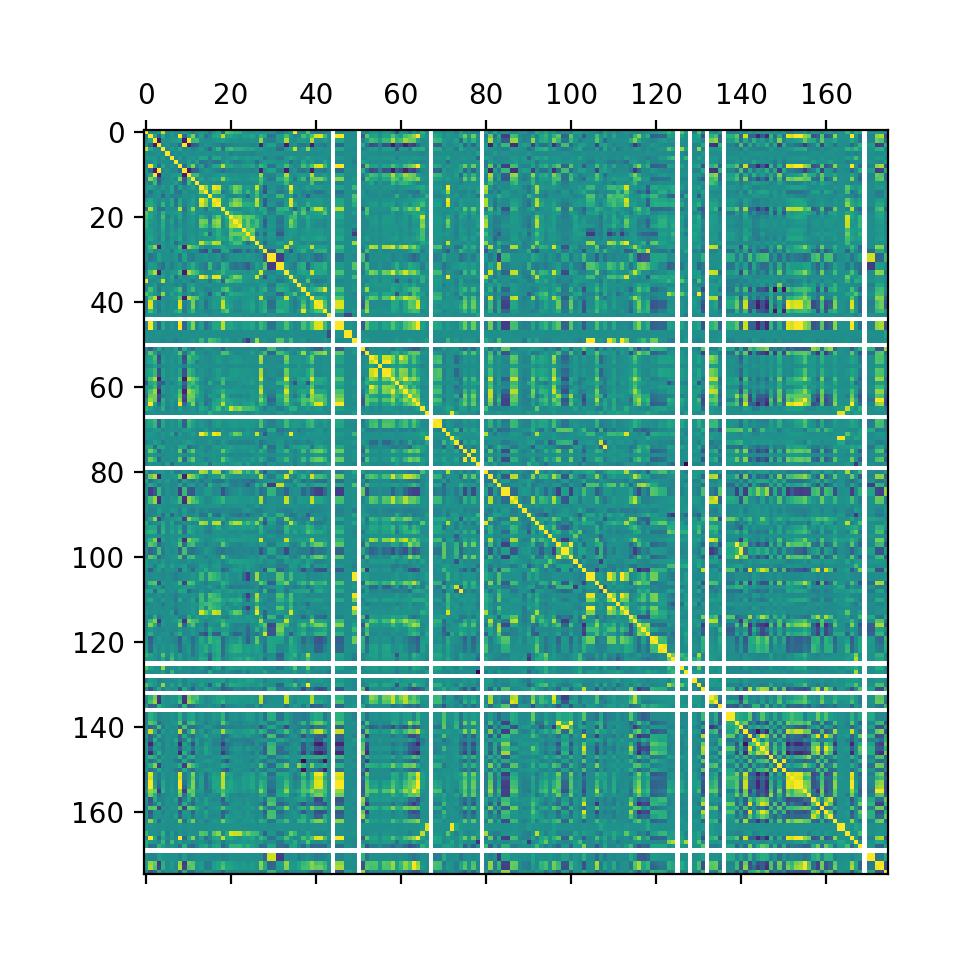

In [140]:
plt.matshow(corr_mat)

In [177]:
min_r = stats.t.isf(0.025, len(df) - 2) / np.sqrt(len(df) + stats.t.isf(0.025, len(df) - 2) ** 2 - 2)

In [178]:
min_r

0.001867249447440096

In [31]:
def corr_df(x, corr_val):
    '''
    Obj: Drops features that are strongly correlated to other features.
          This lowers model complexity, and aids in generalizing the model.
    Inputs:
          df: features df (x)
          corr_val: Columns are dropped relative to the corr_val input (e.g. 0.8)
    Output: df that only includes uncorrelated features
    '''

    # Creates Correlation Matrix and Instantiates
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterates through Correlation Matrix Table to find correlated columns
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = item.values
            if abs(val) >= corr_val:
                # Prints the correlated feature set and the corr val
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(i)

    drops = sorted(set(drop_cols))[::-1]

    # Drops the correlated columns
    for i in drops:
        col = x.iloc[:, (i+1):(i+2)].columns.values
        x = x.drop(col, axis=1)
    return x

In [32]:
corr_df(df, 0.001867249447440096)

Dyno_LoadCell[N] | Time[s]_RawFacilities | 0.05
Distance[mi] | Time[s]_RawFacilities | 0.82
Distance[mi] | Dyno_TractiveForce[N] | 0.01
Dyno_TractiveForce_Front[N] | Time[s]_RawFacilities | 0.08
Dyno_TractiveForce_Front[N] | Dyno_TractiveForce[N] | 0.05
Dyno_TractiveForce_Front[N] | Dyno_LoadCell[N] | -0.06
Dyno_LoadCell_Front[N] | Time[s]_RawFacilities | -0.03
Dyno_LoadCell_Front[N] | Dyno_TractiveForce[N] | 0.1
Dyno_LoadCell_Front[N] | Dyno_LoadCell[N] | -0.05
Dyno_LoadCell_Front[N] | Distance[mi] | -0.01
Dyno_LoadCell_Rear[N] | Time[s]_RawFacilities | 0.05
Dyno_LoadCell_Rear[N] | Dyno_TractiveForce[N] | -0.86
Dyno_LoadCell_Rear[N] | Dyno_LoadCell[N] | 1.0
Dyno_LoadCell_Rear[N] | Distance[mi] | -0.05
Dyno_LoadCell_Rear[N] | Dyno_TractiveForce_Front[N] | -0.06
Dyno_TractiveForce_Rear[N] | Time[s]_RawFacilities | -0.04
Dyno_TractiveForce_Rear[N] | Dyno_TractiveForce[N] | 1.0
Dyno_TractiveForce_Rear[N] | Dyno_LoadCell[N] | -0.86
Dyno_TractiveForce_Rear[N] | Distance[mi] | 0.01
Dyno_Trac

Alternator_Curr_Hioki_I2[A] | Cabin_Temp[C] | -0.26
Alternator_Curr_Hioki_I2[A] | Cabin_Upper_Vent_Temp[C] | -0.41
Alternator_Curr_Hioki_I2[A] | Cabin_Lower_Vent_Temp[C] | -0.09
Alternator_Curr_Hioki_I2[A] | Solar_Array_Ind_Temp[C] | 0.14
Alternator_Curr_Hioki_I2[A] | Eng_FuelFlow_Direct2[gps] | 0.01
Alternator_Curr_Hioki_I2[A] | 12VBatt_Volt_Hioki_U1[V] | 0.43
Alternator_Curr_Hioki_I2[A] | 12VBatt_Curr_Hioki_I1[A] | -0.63
Alternator_Power_Hioki_P2[W] | Time[s]_RawFacilities | -0.19
Alternator_Power_Hioki_P2[W] | Dyno_TractiveForce[N] | 0.07
Alternator_Power_Hioki_P2[W] | Dyno_LoadCell[N] | -0.12
Alternator_Power_Hioki_P2[W] | Distance[mi] | -0.25
Alternator_Power_Hioki_P2[W] | Dyno_TractiveForce_Front[N] | -0.13
Alternator_Power_Hioki_P2[W] | Dyno_LoadCell_Front[N] | 0.02
Alternator_Power_Hioki_P2[W] | Dyno_LoadCell_Rear[N] | -0.12
Alternator_Power_Hioki_P2[W] | Dyno_TractiveForce_Rear[N] | 0.07
Alternator_Power_Hioki_P2[W] | DilAir_RH[%] | 0.24
Alternator_Power_Hioki_P2[W] | Tailpipe

Trans_gear_desired_CAN[] | Dyno_TractiveForce_Front[N] | 0.03
Trans_gear_desired_CAN[] | Dyno_LoadCell_Front[N] | -0.03
Trans_gear_desired_CAN[] | Dyno_LoadCell_Rear[N] | -0.12
Trans_gear_desired_CAN[] | Dyno_TractiveForce_Rear[N] | 0.01
Trans_gear_desired_CAN[] | DilAir_RH[%] | 0.56
Trans_gear_desired_CAN[] | Tailpipe_Press[inH2O] | -0.09
Trans_gear_desired_CAN[] | Cell_Temp[C] | 0.08
Trans_gear_desired_CAN[] | Cell_RH[%] | -0.23
Trans_gear_desired_CAN[] | Cell_Press[inHg] | -0.01
Trans_gear_desired_CAN[] | Tire_Front_Temp[C] | 0.12
Trans_gear_desired_CAN[] | Tire_Rear_Temp[C] | 0.07
Trans_gear_desired_CAN[] | Exhaust_Bag | 0.14
Trans_gear_desired_CAN[] | Engine_Oil_Dipstick_Temp[C] | 0.07
Trans_gear_desired_CAN[] | Radiator_Air_Outlet_Temp[C] | -0.02
Trans_gear_desired_CAN[] | Engine_Bay_Temp[C] | -0.05
Trans_gear_desired_CAN[] | Cabin_Temp[C] | 0.06
Trans_gear_desired_CAN[] | Cabin_Upper_Vent_Temp[C] | 0.07
Trans_gear_desired_CAN[] | Cabin_Lower_Vent_Temp[C] | 0.15
Trans_gear_desire

Eng_start_stop_state_CAN[] | Eng_FuelFlow_Direct[ccps] | 0.2
Eng_start_stop_state_CAN[] | Eng_Fuel_Temp_Direct[C] | -0.02
Eng_start_stop_state_CAN[] | Time[s] | -0.11
Eng_start_stop_state_CAN[] | Trans_shift_inprogress_CAN[] | 0.14
Eng_start_stop_state_CAN[] | Trans_PRNDL_pos_CAN[] | 0.7
Eng_start_stop_state_CAN[] | Vehicle_drive_mode_CAN[] | -0.01
Eng_start_stop_state_CAN[] | Pedal_accel_pos_CAN[per] | 0.25
Eng_start_stop_state_CAN[] | Trans_gear_desired_CAN[] | 0.51
Eng_start_stop_state_CAN[] | Trans_gear_engaged_CAN[] | 0.57
Eng_start_stop_state_CAN[] | Veh_ignition_switch_postion_CAN[] | 0.7
Eng_start_stop_state_CAN[] | Veh_steering_wheel_pos_CAN[] | 0.01
Eng_start_stop_state_CAN[] | HVAC_AC_compressor_engaged_CAN[] | 0.11
AMA_Dilute_THC[mg/s] | Time[s]_RawFacilities | 0.05
AMA_Dilute_THC[mg/s] | Dyno_TractiveForce[N] | 0.4
AMA_Dilute_THC[mg/s] | Dyno_LoadCell[N] | -0.54
AMA_Dilute_THC[mg/s] | Distance[mi] | 0.1
AMA_Dilute_THC[mg/s] | Dyno_TractiveForce_Front[N] | 0.05
AMA_Dilute_T

AMA_Dilute_HFID[mg/s] | Solar_Array_Ind_Temp[C] | -0.0
AMA_Dilute_HFID[mg/s] | Eng_FuelFlow_Direct2[gps] | 0.34
AMA_Dilute_HFID[mg/s] | 12VBatt_Volt_Hioki_U1[V] | -0.03
AMA_Dilute_HFID[mg/s] | 12VBatt_Curr_Hioki_I1[A] | -0.03
AMA_Dilute_HFID[mg/s] | 12VBatt_Power_Hioki_P1[W] | -0.03
AMA_Dilute_HFID[mg/s] | Alternator_Curr_Hioki_I2[A] | 0.27
AMA_Dilute_HFID[mg/s] | Alternator_Power_Hioki_P2[W] | 0.26
AMA_Dilute_HFID[mg/s] | Eng_FuelFlow_Direct[ccps] | 0.36
AMA_Dilute_HFID[mg/s] | Eng_Fuel_Temp_Direct[C] | -0.06
AMA_Dilute_HFID[mg/s] | Time[s] | -0.49
AMA_Dilute_HFID[mg/s] | Trans_shift_inprogress_CAN[] | 0.1
AMA_Dilute_HFID[mg/s] | Trans_PRNDL_pos_CAN[] | 0.11
AMA_Dilute_HFID[mg/s] | Vehicle_drive_mode_CAN[] | -0.48
AMA_Dilute_HFID[mg/s] | Pedal_accel_pos_CAN[per] | 0.38
AMA_Dilute_HFID[mg/s] | Trans_gear_desired_CAN[] | 0.2
AMA_Dilute_HFID[mg/s] | Trans_gear_engaged_CAN[] | 0.2
AMA_Dilute_HFID[mg/s] | Veh_ignition_switch_postion_CAN[] | 0.11
AMA_Dilute_HFID[mg/s] | Veh_steering_wheel_p

Eng_cylinder_head_temperature_PCM[C] | HVAC_AC_compressor_engaged_CAN[] | 0.02
Eng_cylinder_head_temperature_PCM[C] | Eng_start_stop_active_CAN[] | -0.1
Eng_cylinder_head_temperature_PCM[C] | Eng_start_stop_state_CAN[] | 0.03
Eng_cylinder_head_temperature_PCM[C] | AMA_Dilute_THC[mg/s] | -0.03
Eng_cylinder_head_temperature_PCM[C] | AMA_Dilute_CH4[mg/s] | 0.03
Eng_cylinder_head_temperature_PCM[C] | AMA_Dilute_NOx[mg/s] | -0.08
Eng_cylinder_head_temperature_PCM[C] | AMA_Dilute_COlow[mg/s] | 0.03
Eng_cylinder_head_temperature_PCM[C] | AMA_Dilute_COmid[mg/s] | 0.04
Eng_cylinder_head_temperature_PCM[C] | AMA_Dilute_CO2[mg/s] | 0.01
Eng_cylinder_head_temperature_PCM[C] | AMA_Dilute_NMHC[mg/s] | -0.06
Eng_cylinder_head_temperature_PCM[C] | AMA_Dilute_Fuel[g/s] | 0.02
Eng_cylinder_head_temperature_PCM[C] | Eng_load_PCM[per] | -0.06
Veh_barometric_press_PCM[kPa] | Time[s]_RawFacilities | -0.02
Veh_barometric_press_PCM[kPa] | Dyno_LoadCell[N] | -0.01
Veh_barometric_press_PCM[kPa] | Distance[mi] |

Veh_ambient_air_temp_PCM[C] | Cabin_Temp[C] | 0.06
Veh_ambient_air_temp_PCM[C] | Cabin_Upper_Vent_Temp[C] | 0.11
Veh_ambient_air_temp_PCM[C] | Cabin_Lower_Vent_Temp[C] | 0.02
Veh_ambient_air_temp_PCM[C] | Solar_Array_Ind_Temp[C] | 0.84
Veh_ambient_air_temp_PCM[C] | Eng_FuelFlow_Direct2[gps] | 0.04
Veh_ambient_air_temp_PCM[C] | 12VBatt_Volt_Hioki_U1[V] | -0.43
Veh_ambient_air_temp_PCM[C] | 12VBatt_Curr_Hioki_I1[A] | 0.01
Veh_ambient_air_temp_PCM[C] | 12VBatt_Power_Hioki_P1[W] | 0.0
Veh_ambient_air_temp_PCM[C] | Alternator_Curr_Hioki_I2[A] | -0.07
Veh_ambient_air_temp_PCM[C] | Alternator_Power_Hioki_P2[W] | -0.1
Veh_ambient_air_temp_PCM[C] | Eng_FuelFlow_Direct[ccps] | 0.04
Veh_ambient_air_temp_PCM[C] | Eng_Fuel_Temp_Direct[C] | 0.98
Veh_ambient_air_temp_PCM[C] | Time[s] | 0.04
Veh_ambient_air_temp_PCM[C] | Trans_shift_inprogress_CAN[] | -0.02
Veh_ambient_air_temp_PCM[C] | Trans_PRNDL_pos_CAN[] | -0.01
Veh_ambient_air_temp_PCM[C] | Vehicle_drive_mode_CAN[] | 0.1
Veh_ambient_air_temp_PCM[

Eng_evap_canister_vent_valve_dutycycle_PCM[per] | Trans_PRNDL_pos_CAN[] | 0.03
Eng_evap_canister_vent_valve_dutycycle_PCM[per] | Vehicle_drive_mode_CAN[] | -0.03
Eng_evap_canister_vent_valve_dutycycle_PCM[per] | Pedal_accel_pos_CAN[per] | 0.03
Eng_evap_canister_vent_valve_dutycycle_PCM[per] | Trans_gear_desired_CAN[] | 0.08
Eng_evap_canister_vent_valve_dutycycle_PCM[per] | Trans_gear_engaged_CAN[] | 0.09
Eng_evap_canister_vent_valve_dutycycle_PCM[per] | Veh_ignition_switch_postion_CAN[] | 0.03
Eng_evap_canister_vent_valve_dutycycle_PCM[per] | Veh_steering_wheel_pos_CAN[] | -0.0
Eng_evap_canister_vent_valve_dutycycle_PCM[per] | HVAC_AC_compressor_engaged_CAN[] | 0.06
Eng_evap_canister_vent_valve_dutycycle_PCM[per] | Eng_start_stop_active_CAN[] | -0.03
Eng_evap_canister_vent_valve_dutycycle_PCM[per] | Eng_start_stop_state_CAN[] | 0.05
Eng_evap_canister_vent_valve_dutycycle_PCM[per] | AMA_Dilute_THC[mg/s] | 0.0
Eng_evap_canister_vent_valve_dutycycle_PCM[per] | AMA_Dilute_NOx[mg/s] | -0.01

Eng_misfire_count_PCM[] | Cell_Press[inHg] | -0.02
Eng_misfire_count_PCM[] | Tire_Front_Temp[C] | -0.19
Eng_misfire_count_PCM[] | Tire_Rear_Temp[C] | -0.22
Eng_misfire_count_PCM[] | Exhaust_Bag | 0.03
Eng_misfire_count_PCM[] | Engine_Oil_Dipstick_Temp[C] | -0.16
Eng_misfire_count_PCM[] | Radiator_Air_Outlet_Temp[C] | -0.16
Eng_misfire_count_PCM[] | Engine_Bay_Temp[C] | -0.12
Eng_misfire_count_PCM[] | Cabin_Temp[C] | -0.22
Eng_misfire_count_PCM[] | Cabin_Upper_Vent_Temp[C] | -0.17
Eng_misfire_count_PCM[] | Cabin_Lower_Vent_Temp[C] | -0.31
Eng_misfire_count_PCM[] | Solar_Array_Ind_Temp[C] | -0.14
Eng_misfire_count_PCM[] | Eng_FuelFlow_Direct2[gps] | -0.09
Eng_misfire_count_PCM[] | 12VBatt_Volt_Hioki_U1[V] | -0.04
Eng_misfire_count_PCM[] | 12VBatt_Curr_Hioki_I1[A] | 0.03
Eng_misfire_count_PCM[] | 12VBatt_Power_Hioki_P1[W] | 0.02
Eng_misfire_count_PCM[] | Alternator_Curr_Hioki_I2[A] | -0.01
Eng_misfire_count_PCM[] | Alternator_Power_Hioki_P2[W] | -0.01
Eng_misfire_count_PCM[] | Eng_FuelFlo

Eng_throttle_electronic_control_actual_PCM[deg] | Pedal_accel_pos_CAN[per] | 0.77
Eng_throttle_electronic_control_actual_PCM[deg] | Trans_gear_desired_CAN[] | 0.2
Eng_throttle_electronic_control_actual_PCM[deg] | Trans_gear_engaged_CAN[] | 0.19
Eng_throttle_electronic_control_actual_PCM[deg] | Veh_ignition_switch_postion_CAN[] | 0.08
Eng_throttle_electronic_control_actual_PCM[deg] | Veh_steering_wheel_pos_CAN[] | 0.01
Eng_throttle_electronic_control_actual_PCM[deg] | HVAC_AC_compressor_engaged_CAN[] | 0.01
Eng_throttle_electronic_control_actual_PCM[deg] | Eng_start_stop_active_CAN[] | -0.1
Eng_throttle_electronic_control_actual_PCM[deg] | Eng_start_stop_state_CAN[] | 0.07
Eng_throttle_electronic_control_actual_PCM[deg] | AMA_Dilute_THC[mg/s] | 0.5
Eng_throttle_electronic_control_actual_PCM[deg] | AMA_Dilute_CH4[mg/s] | 0.44
Eng_throttle_electronic_control_actual_PCM[deg] | AMA_Dilute_NOx[mg/s] | 0.12
Eng_throttle_electronic_control_actual_PCM[deg] | AMA_Dilute_COlow[mg/s] | 0.48
Eng_th

Eng_learned_relative_octane_adjustment_PCM[per] | Eng_speed_PCM[rpm] | -0.17
Eng_learned_relative_octane_adjustment_PCM[per] | Eng_cylinder_head_temperature_PCM[C] | -0.08
Eng_learned_relative_octane_adjustment_PCM[per] | Veh_barometric_press_PCM[kPa] | 0.12
Eng_learned_relative_octane_adjustment_PCM[per] | Eng_knock_sensor1_PCM[] | -0.11
Eng_learned_relative_octane_adjustment_PCM[per] | Eng_knock_sensor2_PCM[] | -0.1
Eng_learned_relative_octane_adjustment_PCM[per] | Eng_spark_advance_PCM[deg] | 0.03
Eng_learned_relative_octane_adjustment_PCM[per] | Veh_ambient_air_temp_PCM[C] | -0.21
Eng_learned_relative_octane_adjustment_PCM[per] | Eng_o2s11_active_status_PCM[] | 0.08
Eng_learned_relative_octane_adjustment_PCM[per] | Eng_air_fuel_ratio_commanded_bank1_PCM[] | 0.11
Eng_learned_relative_octane_adjustment_PCM[per] | Eng_equivalance_ratio_o2s11_PCM[lambda] | -0.08
Eng_learned_relative_octane_adjustment_PCM[per] | Eng_evap_canister_purge_valve_dutycycle_PCM[per] | -0.04
Eng_learned_relati

Eng_long_term_fuel_trim_bank1_PCM[per] | AMA_Dilute_CO2[mg/s] | 0.29
Eng_long_term_fuel_trim_bank1_PCM[per] | AMA_Dilute_HFID[mg/s] | -0.2
Eng_long_term_fuel_trim_bank1_PCM[per] | AMA_Dilute_NMHC[mg/s] | 0.12
Eng_long_term_fuel_trim_bank1_PCM[per] | AMA_Dilute_Fuel[g/s] | 0.27
Eng_long_term_fuel_trim_bank1_PCM[per] | Eng_load_PCM[per] | 0.28
Eng_long_term_fuel_trim_bank1_PCM[per] | Eng_speed_PCM[rpm] | 0.4
Eng_long_term_fuel_trim_bank1_PCM[per] | Eng_cylinder_head_temperature_PCM[C] | -0.04
Eng_long_term_fuel_trim_bank1_PCM[per] | Veh_barometric_press_PCM[kPa] | -0.02
Eng_long_term_fuel_trim_bank1_PCM[per] | Eng_knock_sensor1_PCM[] | 0.2
Eng_long_term_fuel_trim_bank1_PCM[per] | Eng_knock_sensor2_PCM[] | 0.16
Eng_long_term_fuel_trim_bank1_PCM[per] | Eng_spark_advance_PCM[deg] | 0.07
Eng_long_term_fuel_trim_bank1_PCM[per] | Veh_ambient_air_temp_PCM[C] | 0.01
Eng_long_term_fuel_trim_bank1_PCM[per] | Eng_o2s11_active_status_PCM[] | -0.02
Eng_long_term_fuel_trim_bank1_PCM[per] | Eng_air_fue

Eng_camshaft_intake_position_actual_bank1_PCM[deg] | Alternator_Power_Hioki_P2[W] | -0.14
Eng_camshaft_intake_position_actual_bank1_PCM[deg] | Eng_FuelFlow_Direct[ccps] | -0.54
Eng_camshaft_intake_position_actual_bank1_PCM[deg] | Eng_Fuel_Temp_Direct[C] | -0.06
Eng_camshaft_intake_position_actual_bank1_PCM[deg] | Time[s] | -0.04
Eng_camshaft_intake_position_actual_bank1_PCM[deg] | Trans_shift_inprogress_CAN[] | -0.15
Eng_camshaft_intake_position_actual_bank1_PCM[deg] | Trans_PRNDL_pos_CAN[] | -0.17
Eng_camshaft_intake_position_actual_bank1_PCM[deg] | Vehicle_drive_mode_CAN[] | -0.15
Eng_camshaft_intake_position_actual_bank1_PCM[deg] | Pedal_accel_pos_CAN[per] | -0.38
Eng_camshaft_intake_position_actual_bank1_PCM[deg] | Trans_gear_desired_CAN[] | -0.21
Eng_camshaft_intake_position_actual_bank1_PCM[deg] | Trans_gear_engaged_CAN[] | -0.23
Eng_camshaft_intake_position_actual_bank1_PCM[deg] | Veh_ignition_switch_postion_CAN[] | -0.17
Eng_camshaft_intake_position_actual_bank1_PCM[deg] | Veh_

Eng_short_term_fuel_trim_bank2_PCM[per] | Eng_rear_O2_fuel_trim_bank1_PCM[per] | 0.02
Eng_short_term_fuel_trim_bank2_PCM[per] | Eng_knock_control_spark_adjustment_PCM[deg] | -0.0
Eng_short_term_fuel_trim_bank2_PCM[per] | Eng_learned_relative_octane_adjustment_PCM[per] | -0.08
Eng_short_term_fuel_trim_bank2_PCM[per] | Eng_manifold_absolute_pressure_PCM[kPa] | 0.08
Eng_short_term_fuel_trim_bank2_PCM[per] | Eng_charge_air_cooler_temp_PCM[C] | 0.13
Eng_short_term_fuel_trim_bank2_PCM[per] | Eng_fuel_rail_press_PCM[kPa] | 0.1
Eng_short_term_fuel_trim_bank2_PCM[per] | Eng_long_term_fuel_trim_bank1_PCM[per] | 0.05
Eng_short_term_fuel_trim_bank2_PCM[per] | Eng_short_term_fuel_trim_bank1_PCM[per] | 0.53
Eng_short_term_fuel_trim_bank2_PCM[per] | Eng_measured_boost_at_throttle_inlet_press_sensor_abs_PCM[kPa] | 0.16
Eng_short_term_fuel_trim_bank2_PCM[per] | Eng_camshaft_exhaust_position_actual_bank1_PCM[deg] | -0.06
Eng_short_term_fuel_trim_bank2_PCM[per] | Eng_camshaft_intake_position_actual_bank1

HVAC_air_conditioning_request_signal_PCM[] | Alternator_Power_Hioki_P2[W] | 0.45
HVAC_air_conditioning_request_signal_PCM[] | Eng_FuelFlow_Direct[ccps] | 0.02
HVAC_air_conditioning_request_signal_PCM[] | Eng_Fuel_Temp_Direct[C] | 0.37
HVAC_air_conditioning_request_signal_PCM[] | Time[s] | 0.0
HVAC_air_conditioning_request_signal_PCM[] | Trans_shift_inprogress_CAN[] | 0.03
HVAC_air_conditioning_request_signal_PCM[] | Trans_PRNDL_pos_CAN[] | 0.06
HVAC_air_conditioning_request_signal_PCM[] | Vehicle_drive_mode_CAN[] | -0.08
HVAC_air_conditioning_request_signal_PCM[] | Pedal_accel_pos_CAN[per] | -0.01
HVAC_air_conditioning_request_signal_PCM[] | Trans_gear_desired_CAN[] | -0.03
HVAC_air_conditioning_request_signal_PCM[] | Trans_gear_engaged_CAN[] | -0.02
HVAC_air_conditioning_request_signal_PCM[] | Veh_ignition_switch_postion_CAN[] | 0.06
HVAC_air_conditioning_request_signal_PCM[] | Veh_steering_wheel_pos_CAN[] | -0.01
HVAC_air_conditioning_request_signal_PCM[] | HVAC_AC_compressor_engaged

Eng_equivalance_ratio_o2s21_PCM[lambda] | Eng_knock_sensor1_PCM[] | -0.08
Eng_equivalance_ratio_o2s21_PCM[lambda] | Eng_knock_sensor2_PCM[] | -0.07
Eng_equivalance_ratio_o2s21_PCM[lambda] | Eng_spark_advance_PCM[deg] | -0.33
Eng_equivalance_ratio_o2s21_PCM[lambda] | Veh_ambient_air_temp_PCM[C] | 0.04
Eng_equivalance_ratio_o2s21_PCM[lambda] | Eng_o2s11_active_status_PCM[] | 0.04
Eng_equivalance_ratio_o2s21_PCM[lambda] | Eng_air_fuel_ratio_commanded_bank1_PCM[] | -0.36
Eng_equivalance_ratio_o2s21_PCM[lambda] | Eng_equivalance_ratio_o2s11_PCM[lambda] | 0.98
Eng_equivalance_ratio_o2s21_PCM[lambda] | Eng_evap_canister_purge_valve_dutycycle_PCM[per] | -0.15
Eng_equivalance_ratio_o2s21_PCM[lambda] | Eng_evap_canister_vent_valve_dutycycle_PCM[per] | -0.01
Eng_equivalance_ratio_o2s21_PCM[lambda] | Eng_evap_commanded_purge_PCM[per] | -0.15
Eng_equivalance_ratio_o2s21_PCM[lambda] | Eng_evap_system_monitor_evaluated_PCM[] | -0.03
Eng_equivalance_ratio_o2s21_PCM[lambda] | Eng_intake_air_temp_PCM[C]

Fuel_level_PCM[per] | Eng_learned_relative_octane_adjustment_PCM[per] | 0.05
Fuel_level_PCM[per] | Eng_manifold_absolute_pressure_PCM[kPa] | 0.06
Fuel_level_PCM[per] | Eng_charge_air_cooler_temp_PCM[C] | 0.21
Fuel_level_PCM[per] | Eng_fuel_rail_press_PCM[kPa] | -0.06
Fuel_level_PCM[per] | Eng_long_term_fuel_trim_bank1_PCM[per] | -0.12
Fuel_level_PCM[per] | Eng_short_term_fuel_trim_bank1_PCM[per] | 0.01
Fuel_level_PCM[per] | Eng_measured_boost_at_throttle_inlet_press_sensor_abs_PCM[kPa] | -0.01
Fuel_level_PCM[per] | Eng_camshaft_exhaust_position_actual_bank1_PCM[deg] | 0.02
Fuel_level_PCM[per] | Eng_camshaft_intake_position_actual_bank1_PCM[deg] | 0.04
Fuel_level_PCM[per] | Eng_camshaft_intake_position_actual_bank2_PCM[deg] | 0.04
Fuel_level_PCM[per] | Eng_camshaft_exhaust_position_actual_bank2_PCM[deg] | 0.02
Fuel_level_PCM[per] | Eng_short_term_fuel_trim_bank2_PCM[per] | -0.06
Fuel_level_PCM[per] | Eng_long_term_fuel_trim_bank2_PCM[per] | -0.05
Fuel_level_PCM[per] | Fuel_pump_flow_rat

Eng_fuel_percent_to_DI_commanded_PCM[per] | Eng_camshaft_exhaust_position_actual_bank1_PCM[deg] | -0.32
Eng_fuel_percent_to_DI_commanded_PCM[per] | Eng_camshaft_intake_position_actual_bank1_PCM[deg] | -0.18
Eng_fuel_percent_to_DI_commanded_PCM[per] | Eng_camshaft_intake_position_actual_bank2_PCM[deg] | -0.18
Eng_fuel_percent_to_DI_commanded_PCM[per] | Eng_camshaft_exhaust_position_actual_bank2_PCM[deg] | -0.32
Eng_fuel_percent_to_DI_commanded_PCM[per] | Eng_short_term_fuel_trim_bank2_PCM[per] | 0.09
Eng_fuel_percent_to_DI_commanded_PCM[per] | Eng_long_term_fuel_trim_bank2_PCM[per] | -0.18
Eng_fuel_percent_to_DI_commanded_PCM[per] | Fuel_pump_flow_rate_PCM[per] | 0.73
Eng_fuel_percent_to_DI_commanded_PCM[per] | HVAC_air_conditioning_compressor_commanded_state_PCM[] | -0.05
Eng_fuel_percent_to_DI_commanded_PCM[per] | HVAC_air_conditioning_request_signal_PCM[] | -0.05
Eng_fuel_percent_to_DI_commanded_PCM[per] | Eng_oil_pressure_PCM[kPa] | -0.3
Eng_fuel_percent_to_DI_commanded_PCM[per] | E

Eng_gen_monitor_PCM[per] | Eng_camshaft_intake_position_actual_bank1_PCM[deg] | -0.09
Eng_gen_monitor_PCM[per] | Eng_camshaft_intake_position_actual_bank2_PCM[deg] | -0.09
Eng_gen_monitor_PCM[per] | Eng_camshaft_exhaust_position_actual_bank2_PCM[deg] | 0.04
Eng_gen_monitor_PCM[per] | Eng_short_term_fuel_trim_bank2_PCM[per] | -0.09
Eng_gen_monitor_PCM[per] | Eng_long_term_fuel_trim_bank2_PCM[per] | -0.07
Eng_gen_monitor_PCM[per] | Fuel_pump_flow_rate_PCM[per] | -0.55
Eng_gen_monitor_PCM[per] | HVAC_air_conditioning_compressor_commanded_state_PCM[] | 0.37
Eng_gen_monitor_PCM[per] | HVAC_air_conditioning_request_signal_PCM[] | 0.37
Eng_gen_monitor_PCM[per] | Eng_oil_pressure_PCM[kPa] | 0.37
Eng_gen_monitor_PCM[per] | Eng_air_fuel_ratio_commanded_bank2_PCM[] | 0.04
Eng_gen_monitor_PCM[per] | Eng_equivalance_ratio_o2s21_PCM[lambda] | 0.13
Eng_gen_monitor_PCM[per] | HVAC_air_conditioning_variable_comp_current_PCM[A] | 0.4
Eng_gen_monitor_PCM[per] | Eng_cooling_fan_speed_desired_PCM[per] | 0.

Grille_shutter_A_pos_inferred_PCM[per] | Eng_learned_relative_octane_adjustment_PCM[per] | 0.1
Grille_shutter_A_pos_inferred_PCM[per] | Eng_manifold_absolute_pressure_PCM[kPa] | 0.08
Grille_shutter_A_pos_inferred_PCM[per] | Eng_charge_air_cooler_temp_PCM[C] | 0.31
Grille_shutter_A_pos_inferred_PCM[per] | Eng_fuel_rail_press_PCM[kPa] | 0.01
Grille_shutter_A_pos_inferred_PCM[per] | Eng_long_term_fuel_trim_bank1_PCM[per] | -0.19
Grille_shutter_A_pos_inferred_PCM[per] | Eng_short_term_fuel_trim_bank1_PCM[per] | -0.02
Grille_shutter_A_pos_inferred_PCM[per] | Eng_measured_boost_at_throttle_inlet_press_sensor_abs_PCM[kPa] | 0.01
Grille_shutter_A_pos_inferred_PCM[per] | Eng_camshaft_exhaust_position_actual_bank1_PCM[deg] | -0.32
Grille_shutter_A_pos_inferred_PCM[per] | Eng_camshaft_intake_position_actual_bank1_PCM[deg] | 0.06
Grille_shutter_A_pos_inferred_PCM[per] | Eng_camshaft_intake_position_actual_bank2_PCM[deg] | 0.05
Grille_shutter_A_pos_inferred_PCM[per] | Eng_camshaft_exhaust_position_

Eng_cyl_1_knock_perf_counter_PCM[] | Eng_o2s11_active_status_PCM[] | 0.01
Eng_cyl_1_knock_perf_counter_PCM[] | Eng_air_fuel_ratio_commanded_bank1_PCM[] | -0.09
Eng_cyl_1_knock_perf_counter_PCM[] | Eng_equivalance_ratio_o2s11_PCM[lambda] | 0.16
Eng_cyl_1_knock_perf_counter_PCM[] | Eng_evap_canister_purge_valve_dutycycle_PCM[per] | 0.03
Eng_cyl_1_knock_perf_counter_PCM[] | Eng_evap_canister_vent_valve_dutycycle_PCM[per] | -0.02
Eng_cyl_1_knock_perf_counter_PCM[] | Eng_evap_commanded_purge_PCM[per] | 0.03
Eng_cyl_1_knock_perf_counter_PCM[] | Eng_evap_system_monitor_evaluated_PCM[] | -0.19
Eng_cyl_1_knock_perf_counter_PCM[] | Eng_intake_air_temp_PCM[C] | 0.06
Eng_cyl_1_knock_perf_counter_PCM[] | Eng_load_absolute_PCM[per] | 0.01
Eng_cyl_1_knock_perf_counter_PCM[] | Eng_misfire_count_PCM[] | -0.03
Eng_cyl_1_knock_perf_counter_PCM[] | Eng_generator_current_corrected_PCM[A] | -0.05
Eng_cyl_1_knock_perf_counter_PCM[] | Brake_pressure_applied_PCM[] | -0.13
Eng_cyl_1_knock_perf_counter_PCM[] | B

Eng_cyl_5_knock_perf_counter_PCM[] | Pedal_accel_pos_CAN[per] | -0.01
Eng_cyl_5_knock_perf_counter_PCM[] | Trans_gear_desired_CAN[] | -0.04
Eng_cyl_5_knock_perf_counter_PCM[] | Trans_gear_engaged_CAN[] | -0.04
Eng_cyl_5_knock_perf_counter_PCM[] | Veh_ignition_switch_postion_CAN[] | -0.02
Eng_cyl_5_knock_perf_counter_PCM[] | Veh_steering_wheel_pos_CAN[] | -0.16
Eng_cyl_5_knock_perf_counter_PCM[] | HVAC_AC_compressor_engaged_CAN[] | 0.09
Eng_cyl_5_knock_perf_counter_PCM[] | Eng_start_stop_active_CAN[] | -0.01
Eng_cyl_5_knock_perf_counter_PCM[] | Eng_start_stop_state_CAN[] | -0.06
Eng_cyl_5_knock_perf_counter_PCM[] | AMA_Dilute_THC[mg/s] | 0.03
Eng_cyl_5_knock_perf_counter_PCM[] | AMA_Dilute_CH4[mg/s] | 0.03
Eng_cyl_5_knock_perf_counter_PCM[] | AMA_Dilute_NOx[mg/s] | -0.0
Eng_cyl_5_knock_perf_counter_PCM[] | AMA_Dilute_COlow[mg/s] | 0.04
Eng_cyl_5_knock_perf_counter_PCM[] | AMA_Dilute_COmid[mg/s] | 0.04
Eng_cyl_5_knock_perf_counter_PCM[] | AMA_Dilute_CO2[mg/s] | 0.02
Eng_cyl_5_knock_perf_

Eng_powertrain_drive_mode_actual_PCM[] | Eng_cyl_5_knock_perf_counter_PCM[] | 0.13
Eng_idle_speed_desired_PCM[rpm] | Time[s]_RawFacilities | -0.03
Eng_idle_speed_desired_PCM[rpm] | Dyno_TractiveForce[N] | -0.08
Eng_idle_speed_desired_PCM[rpm] | Dyno_LoadCell[N] | 0.22
Eng_idle_speed_desired_PCM[rpm] | Distance[mi] | -0.13
Eng_idle_speed_desired_PCM[rpm] | Dyno_TractiveForce_Front[N] | -0.03
Eng_idle_speed_desired_PCM[rpm] | Dyno_LoadCell_Front[N] | 0.02
Eng_idle_speed_desired_PCM[rpm] | Dyno_LoadCell_Rear[N] | 0.22
Eng_idle_speed_desired_PCM[rpm] | Dyno_TractiveForce_Rear[N] | -0.08
Eng_idle_speed_desired_PCM[rpm] | DilAir_RH[%] | -0.39
Eng_idle_speed_desired_PCM[rpm] | Tailpipe_Press[inH2O] | 0.02
Eng_idle_speed_desired_PCM[rpm] | Cell_Temp[C] | -0.06
Eng_idle_speed_desired_PCM[rpm] | Cell_RH[%] | 0.14
Eng_idle_speed_desired_PCM[rpm] | Cell_Press[inHg] | 0.05
Eng_idle_speed_desired_PCM[rpm] | Tire_Front_Temp[C] | -0.06
Eng_idle_speed_desired_PCM[rpm] | Tire_Rear_Temp[C] | -0.11
Eng_id

Eng_throttle_position_relative_PCM[] | Brake_pedal_applied_PCM[] | -0.3
Eng_throttle_position_relative_PCM[] | Eng_throttle_electronic_control_actual_PCM[deg] | 0.92
Eng_throttle_position_relative_PCM[] | Eng_throttle_position_PCM[per] | 0.82
Eng_throttle_position_relative_PCM[] | Eng_rear_O2_fuel_trim_bank1_PCM[per] | -0.03
Eng_throttle_position_relative_PCM[] | Eng_knock_control_spark_adjustment_PCM[deg] | -0.17
Eng_throttle_position_relative_PCM[] | Eng_learned_relative_octane_adjustment_PCM[per] | -0.08
Eng_throttle_position_relative_PCM[] | Eng_manifold_absolute_pressure_PCM[kPa] | 0.71
Eng_throttle_position_relative_PCM[] | Eng_charge_air_cooler_temp_PCM[C] | 0.02
Eng_throttle_position_relative_PCM[] | Eng_fuel_rail_press_PCM[kPa] | 0.36
Eng_throttle_position_relative_PCM[] | Eng_long_term_fuel_trim_bank1_PCM[per] | 0.25
Eng_throttle_position_relative_PCM[] | Eng_short_term_fuel_trim_bank1_PCM[per] | 0.06
Eng_throttle_position_relative_PCM[] | Eng_measured_boost_at_throttle_inlet

Eng_wastegate_pos_sensor_B_position_corrected_PCM[per] | Solar_Array_Ind_Temp[C] | -0.07
Eng_wastegate_pos_sensor_B_position_corrected_PCM[per] | Eng_FuelFlow_Direct2[gps] | 0.08
Eng_wastegate_pos_sensor_B_position_corrected_PCM[per] | 12VBatt_Volt_Hioki_U1[V] | -0.24
Eng_wastegate_pos_sensor_B_position_corrected_PCM[per] | 12VBatt_Curr_Hioki_I1[A] | 0.24
Eng_wastegate_pos_sensor_B_position_corrected_PCM[per] | 12VBatt_Power_Hioki_P1[W] | 0.24
Eng_wastegate_pos_sensor_B_position_corrected_PCM[per] | Alternator_Curr_Hioki_I2[A] | -0.22
Eng_wastegate_pos_sensor_B_position_corrected_PCM[per] | Alternator_Power_Hioki_P2[W] | -0.22
Eng_wastegate_pos_sensor_B_position_corrected_PCM[per] | Eng_FuelFlow_Direct[ccps] | 0.09
Eng_wastegate_pos_sensor_B_position_corrected_PCM[per] | Eng_Fuel_Temp_Direct[C] | -0.0
Eng_wastegate_pos_sensor_B_position_corrected_PCM[per] | Time[s] | -0.14
Eng_wastegate_pos_sensor_B_position_corrected_PCM[per] | Trans_shift_inprogress_CAN[] | -0.13
Eng_wastegate_pos_se

Eng_camshaft_intake_angle_desired_PCM[deg] | Eng_measured_boost_at_throttle_inlet_press_sensor_abs_PCM[kPa] | -0.64
Eng_camshaft_intake_angle_desired_PCM[deg] | Eng_camshaft_exhaust_position_actual_bank1_PCM[deg] | 0.33
Eng_camshaft_intake_angle_desired_PCM[deg] | Eng_camshaft_intake_position_actual_bank1_PCM[deg] | 0.96
Eng_camshaft_intake_angle_desired_PCM[deg] | Eng_camshaft_intake_position_actual_bank2_PCM[deg] | 0.97
Eng_camshaft_intake_angle_desired_PCM[deg] | Eng_camshaft_exhaust_position_actual_bank2_PCM[deg] | 0.33
Eng_camshaft_intake_angle_desired_PCM[deg] | Eng_short_term_fuel_trim_bank2_PCM[per] | -0.13
Eng_camshaft_intake_angle_desired_PCM[deg] | Eng_long_term_fuel_trim_bank2_PCM[per] | 0.15
Eng_camshaft_intake_angle_desired_PCM[deg] | Fuel_pump_flow_rate_PCM[per] | 0.15
Eng_camshaft_intake_angle_desired_PCM[deg] | HVAC_air_conditioning_compressor_commanded_state_PCM[] | -0.01
Eng_camshaft_intake_angle_desired_PCM[deg] | HVAC_air_conditioning_request_signal_PCM[] | -0.01
E

Trans_torque_converter_slip_actual_TCM[rpm] | Engine_Bay_Temp[C] | -0.1
Trans_torque_converter_slip_actual_TCM[rpm] | Cabin_Temp[C] | -0.12
Trans_torque_converter_slip_actual_TCM[rpm] | Cabin_Upper_Vent_Temp[C] | -0.16
Trans_torque_converter_slip_actual_TCM[rpm] | Cabin_Lower_Vent_Temp[C] | -0.11
Trans_torque_converter_slip_actual_TCM[rpm] | Solar_Array_Ind_Temp[C] | -0.01
Trans_torque_converter_slip_actual_TCM[rpm] | Eng_FuelFlow_Direct2[gps] | 0.03
Trans_torque_converter_slip_actual_TCM[rpm] | 12VBatt_Volt_Hioki_U1[V] | 0.04
Trans_torque_converter_slip_actual_TCM[rpm] | 12VBatt_Curr_Hioki_I1[A] | -0.02
Trans_torque_converter_slip_actual_TCM[rpm] | 12VBatt_Power_Hioki_P1[W] | -0.03
Trans_torque_converter_slip_actual_TCM[rpm] | Alternator_Curr_Hioki_I2[A] | 0.19
Trans_torque_converter_slip_actual_TCM[rpm] | Alternator_Power_Hioki_P2[W] | 0.19
Trans_torque_converter_slip_actual_TCM[rpm] | Eng_FuelFlow_Direct[ccps] | 0.06
Trans_torque_converter_slip_actual_TCM[rpm] | Eng_Fuel_Temp_Direct

Trans_line_pressure_control_TCM[kPa] | Eng_load_absolute_PCM[per] | -0.23
Trans_line_pressure_control_TCM[kPa] | Eng_misfire_count_PCM[] | 0.2
Trans_line_pressure_control_TCM[kPa] | Eng_generator_current_corrected_PCM[A] | -0.38
Trans_line_pressure_control_TCM[kPa] | Brake_pressure_applied_PCM[] | 0.33
Trans_line_pressure_control_TCM[kPa] | Brake_pedal_applied_PCM[] | 0.33
Trans_line_pressure_control_TCM[kPa] | Eng_throttle_electronic_control_actual_PCM[deg] | 0.13
Trans_line_pressure_control_TCM[kPa] | Eng_throttle_position_PCM[per] | 0.14
Trans_line_pressure_control_TCM[kPa] | Eng_rear_O2_fuel_trim_bank1_PCM[per] | -0.01
Trans_line_pressure_control_TCM[kPa] | Eng_knock_control_spark_adjustment_PCM[deg] | 0.0
Trans_line_pressure_control_TCM[kPa] | Eng_learned_relative_octane_adjustment_PCM[per] | 0.03
Trans_line_pressure_control_TCM[kPa] | Eng_manifold_absolute_pressure_PCM[kPa] | 0.52
Trans_line_pressure_control_TCM[kPa] | Eng_charge_air_cooler_temp_PCM[C] | 0.17
Trans_line_pressure_

Trans_shift_time_cmd_to_10_TCM[s] | Eng_throttle_position_relative_PCM[] | 0.15
Trans_shift_time_cmd_to_10_TCM[s] | Eng_torque_control_state_PCM[] | -0.23
Trans_shift_time_cmd_to_10_TCM[s] | Eng_wastegate_pos_sensor_A_position_corrected_PCM[per] | -0.08
Trans_shift_time_cmd_to_10_TCM[s] | Eng_wastegate_pos_sensor_B_position_corrected_PCM[per] | -0.08
Trans_shift_time_cmd_to_10_TCM[s] | Eng_camshaft_exhaust_angle_desired_PCM[deg] | 0.26
Trans_shift_time_cmd_to_10_TCM[s] | Eng_camshaft_intake_angle_desired_PCM[deg] | -0.09
Trans_shift_time_cmd_to_10_TCM[s] | Trans_torque_converter_clutch_solenoid_press_TCM[kPa] | 0.28
Trans_shift_time_cmd_to_10_TCM[s] | Trans_torque_converter_slip_ratio_TCM[] | -0.24
Trans_shift_time_cmd_to_10_TCM[s] | Trans_torque_converter_slip_actual_TCM[rpm] | -0.07
Trans_shift_time_cmd_to_10_TCM[s] | Trans_torque_converter_slip_desired_TCM[rpm] | -0.3
Trans_shift_time_cmd_to_10_TCM[s] | Trans_line_pressure_control_TCM[kPa] | -0.21
Trans_gear_commanded_output_state_c

Trans_gear_engaged_output_state_control_TCM[] | Trans_gear_desired_CAN[] | -0.21
Trans_gear_engaged_output_state_control_TCM[] | Trans_gear_engaged_CAN[] | -0.36
Trans_gear_engaged_output_state_control_TCM[] | Veh_ignition_switch_postion_CAN[] | -0.82
Trans_gear_engaged_output_state_control_TCM[] | Veh_steering_wheel_pos_CAN[] | -0.01
Trans_gear_engaged_output_state_control_TCM[] | HVAC_AC_compressor_engaged_CAN[] | -0.07
Trans_gear_engaged_output_state_control_TCM[] | Eng_start_stop_active_CAN[] | -0.08
Trans_gear_engaged_output_state_control_TCM[] | Eng_start_stop_state_CAN[] | -0.57
Trans_gear_engaged_output_state_control_TCM[] | AMA_Dilute_THC[mg/s] | -0.03
Trans_gear_engaged_output_state_control_TCM[] | AMA_Dilute_CH4[mg/s] | -0.04
Trans_gear_engaged_output_state_control_TCM[] | AMA_Dilute_NOx[mg/s] | -0.02
Trans_gear_engaged_output_state_control_TCM[] | AMA_Dilute_COlow[mg/s] | -0.04
Trans_gear_engaged_output_state_control_TCM[] | AMA_Dilute_COmid[mg/s] | -0.04
Trans_gear_engaged

Trans_intermediate_shaft_A_speed_raw_TCM[rpm] | Eng_throttle_electronic_control_actual_PCM[deg] | 0.27
Trans_intermediate_shaft_A_speed_raw_TCM[rpm] | Eng_throttle_position_PCM[per] | 0.26
Trans_intermediate_shaft_A_speed_raw_TCM[rpm] | Eng_rear_O2_fuel_trim_bank1_PCM[per] | -0.04
Trans_intermediate_shaft_A_speed_raw_TCM[rpm] | Eng_knock_control_spark_adjustment_PCM[deg] | -0.09
Trans_intermediate_shaft_A_speed_raw_TCM[rpm] | Eng_learned_relative_octane_adjustment_PCM[per] | -0.05
Trans_intermediate_shaft_A_speed_raw_TCM[rpm] | Eng_manifold_absolute_pressure_PCM[kPa] | 0.2
Trans_intermediate_shaft_A_speed_raw_TCM[rpm] | Eng_charge_air_cooler_temp_PCM[C] | -0.11
Trans_intermediate_shaft_A_speed_raw_TCM[rpm] | Eng_fuel_rail_press_PCM[kPa] | 0.07
Trans_intermediate_shaft_A_speed_raw_TCM[rpm] | Eng_long_term_fuel_trim_bank1_PCM[per] | 0.16
Trans_intermediate_shaft_A_speed_raw_TCM[rpm] | Eng_short_term_fuel_trim_bank1_PCM[per] | 0.01
Trans_intermediate_shaft_A_speed_raw_TCM[rpm] | Eng_measu

Trans_output_shaft_speed_raw_TCM[rpm] | Eng_gen_monitor_PCM[per] | 0.07
Trans_output_shaft_speed_raw_TCM[rpm] | Eng_gen_desired_voltage_PCM[V] | 0.26
Trans_output_shaft_speed_raw_TCM[rpm] | Grille_shutter_A_pos_commanded_PCM[per] | -0.4
Trans_output_shaft_speed_raw_TCM[rpm] | Grille_shutter_A_pos_inferred_PCM[per] | -0.37
Trans_output_shaft_speed_raw_TCM[rpm] | Grille_shutter_B_pos_commanded_PCM[per] | -0.32
Trans_output_shaft_speed_raw_TCM[rpm] | Grille_shutter_B_pos_measured_PCM[per] | -0.31
Trans_output_shaft_speed_raw_TCM[rpm] | Eng_cyl_1_knock_perf_counter_PCM[] | 0.15
Trans_output_shaft_speed_raw_TCM[rpm] | Eng_cyl_2_knock_perf_counter_PCM[] | 0.11
Trans_output_shaft_speed_raw_TCM[rpm] | Eng_cyl_4_knock_perf_counter_PCM[] | 0.16
Trans_output_shaft_speed_raw_TCM[rpm] | Eng_cyl_5_knock_perf_counter_PCM[] | -0.01
Trans_output_shaft_speed_raw_TCM[rpm] | Eng_learned_knock_comb_performance_detection_rate_PCM[per] | 0.09
Trans_output_shaft_speed_raw_TCM[rpm] | Eng_powertrain_drive_mode_

Trans_shift_time_10_to_90_TCM[s] | Trans_intermediate_shaft_A_speed_raw_TCM[rpm] | 0.38
Trans_shift_time_10_to_90_TCM[s] | Trans_intermediate_shaft_B_speed_raw_TCM[rpm] | 0.53
Trans_shift_time_10_to_90_TCM[s] | Trans_output_shaft_speed_raw_TCM[rpm] | 0.54
Trans_shift_solenoid_pressure_A_TCM[kPa] | Time[s]_RawFacilities | 0.04
Trans_shift_solenoid_pressure_A_TCM[kPa] | Dyno_TractiveForce[N] | 0.2
Trans_shift_solenoid_pressure_A_TCM[kPa] | Dyno_LoadCell[N] | -0.1
Trans_shift_solenoid_pressure_A_TCM[kPa] | Distance[mi] | -0.07
Trans_shift_solenoid_pressure_A_TCM[kPa] | Dyno_TractiveForce_Front[N] | -0.0
Trans_shift_solenoid_pressure_A_TCM[kPa] | Dyno_LoadCell_Front[N] | 0.14
Trans_shift_solenoid_pressure_A_TCM[kPa] | Dyno_LoadCell_Rear[N] | -0.1
Trans_shift_solenoid_pressure_A_TCM[kPa] | Dyno_TractiveForce_Rear[N] | 0.2
Trans_shift_solenoid_pressure_A_TCM[kPa] | DilAir_RH[%] | -0.24
Trans_shift_solenoid_pressure_A_TCM[kPa] | Tailpipe_Press[inH2O] | 0.11
Trans_shift_solenoid_pressure_A_TCM

Trans_shift_solenoid_pressure_C_TCM[kPa] | Eng_FuelFlow_Direct2[gps] | 0.54
Trans_shift_solenoid_pressure_C_TCM[kPa] | 12VBatt_Volt_Hioki_U1[V] | 0.1
Trans_shift_solenoid_pressure_C_TCM[kPa] | 12VBatt_Curr_Hioki_I1[A] | -0.18
Trans_shift_solenoid_pressure_C_TCM[kPa] | 12VBatt_Power_Hioki_P1[W] | -0.17
Trans_shift_solenoid_pressure_C_TCM[kPa] | Alternator_Curr_Hioki_I2[A] | 0.13
Trans_shift_solenoid_pressure_C_TCM[kPa] | Alternator_Power_Hioki_P2[W] | 0.13
Trans_shift_solenoid_pressure_C_TCM[kPa] | Eng_FuelFlow_Direct[ccps] | 0.58
Trans_shift_solenoid_pressure_C_TCM[kPa] | Eng_Fuel_Temp_Direct[C] | 0.01
Trans_shift_solenoid_pressure_C_TCM[kPa] | Time[s] | -0.11
Trans_shift_solenoid_pressure_C_TCM[kPa] | Trans_shift_inprogress_CAN[] | 0.19
Trans_shift_solenoid_pressure_C_TCM[kPa] | Trans_PRNDL_pos_CAN[] | 0.28
Trans_shift_solenoid_pressure_C_TCM[kPa] | Vehicle_drive_mode_CAN[] | 0.02
Trans_shift_solenoid_pressure_C_TCM[kPa] | Pedal_accel_pos_CAN[per] | 0.6
Trans_shift_solenoid_pressure_C

Trans_shift_solenoid_pressure_E_TCM[kPa] | AMA_Dilute_COlow[mg/s] | 0.01
Trans_shift_solenoid_pressure_E_TCM[kPa] | AMA_Dilute_COmid[mg/s] | 0.01
Trans_shift_solenoid_pressure_E_TCM[kPa] | AMA_Dilute_CO2[mg/s] | -0.04
Trans_shift_solenoid_pressure_E_TCM[kPa] | AMA_Dilute_HFID[mg/s] | -0.01
Trans_shift_solenoid_pressure_E_TCM[kPa] | AMA_Dilute_NMHC[mg/s] | 0.03
Trans_shift_solenoid_pressure_E_TCM[kPa] | AMA_Dilute_Fuel[g/s] | -0.04
Trans_shift_solenoid_pressure_E_TCM[kPa] | Eng_load_PCM[per] | -0.29
Trans_shift_solenoid_pressure_E_TCM[kPa] | Eng_speed_PCM[rpm] | -0.28
Trans_shift_solenoid_pressure_E_TCM[kPa] | Eng_cylinder_head_temperature_PCM[C] | -0.02
Trans_shift_solenoid_pressure_E_TCM[kPa] | Veh_barometric_press_PCM[kPa] | 0.0
Trans_shift_solenoid_pressure_E_TCM[kPa] | Eng_knock_sensor1_PCM[] | -0.07
Trans_shift_solenoid_pressure_E_TCM[kPa] | Eng_knock_sensor2_PCM[] | -0.05
Trans_shift_solenoid_pressure_E_TCM[kPa] | Eng_spark_advance_PCM[deg] | 0.18
Trans_shift_solenoid_pressure_E_

Eng_start_stop_main_control_state_TCM[] | Eng_throttle_position_PCM[per] | 0.02
Eng_start_stop_main_control_state_TCM[] | Eng_learned_relative_octane_adjustment_PCM[per] | 0.08
Eng_start_stop_main_control_state_TCM[] | Eng_manifold_absolute_pressure_PCM[kPa] | 0.02
Eng_start_stop_main_control_state_TCM[] | Eng_charge_air_cooler_temp_PCM[C] | 0.04
Eng_start_stop_main_control_state_TCM[] | Eng_fuel_rail_press_PCM[kPa] | 0.02
Eng_start_stop_main_control_state_TCM[] | Eng_long_term_fuel_trim_bank1_PCM[per] | -0.02
Eng_start_stop_main_control_state_TCM[] | Eng_measured_boost_at_throttle_inlet_press_sensor_abs_PCM[kPa] | 0.11
Eng_start_stop_main_control_state_TCM[] | Eng_camshaft_exhaust_position_actual_bank1_PCM[deg] | 0.01
Eng_start_stop_main_control_state_TCM[] | Eng_camshaft_intake_position_actual_bank1_PCM[deg] | -0.01
Eng_start_stop_main_control_state_TCM[] | Eng_camshaft_intake_position_actual_bank2_PCM[deg] | -0.01
Eng_start_stop_main_control_state_TCM[] | Eng_camshaft_exhaust_positi

Trans_fluid_temp_TCM[C] | Eng_gen_current_max_PCM[A] | -0.16
Trans_fluid_temp_TCM[C] | Eng_gen_monitor_PCM[per] | -0.07
Trans_fluid_temp_TCM[C] | Eng_gen_desired_voltage_PCM[V] | -0.33
Trans_fluid_temp_TCM[C] | Grille_shutter_A_pos_commanded_PCM[per] | 0.12
Trans_fluid_temp_TCM[C] | Grille_shutter_A_pos_inferred_PCM[per] | 0.16
Trans_fluid_temp_TCM[C] | Grille_shutter_B_pos_commanded_PCM[per] | 0.32
Trans_fluid_temp_TCM[C] | Grille_shutter_B_pos_measured_PCM[per] | 0.34
Trans_fluid_temp_TCM[C] | Eng_cyl_1_knock_perf_counter_PCM[] | 0.07
Trans_fluid_temp_TCM[C] | Eng_cyl_2_knock_perf_counter_PCM[] | 0.14
Trans_fluid_temp_TCM[C] | Eng_cyl_4_knock_perf_counter_PCM[] | 0.11
Trans_fluid_temp_TCM[C] | Eng_cyl_5_knock_perf_counter_PCM[] | -0.08
Trans_fluid_temp_TCM[C] | Eng_learned_knock_comb_performance_detection_rate_PCM[per] | 0.07
Trans_fluid_temp_TCM[C] | Eng_powertrain_drive_mode_actual_PCM[] | 0.18
Trans_fluid_temp_TCM[C] | Eng_idle_speed_desired_PCM[rpm] | -0.13
Trans_fluid_temp_TCM[C

Eng_fuel_low_side_press_PCM[kpa] | Grille_shutter_B_pos_commanded_PCM[per] | 0.2
Eng_fuel_low_side_press_PCM[kpa] | Grille_shutter_B_pos_measured_PCM[per] | 0.19
Eng_fuel_low_side_press_PCM[kpa] | Eng_cyl_1_knock_perf_counter_PCM[] | -0.01
Eng_fuel_low_side_press_PCM[kpa] | Eng_cyl_2_knock_perf_counter_PCM[] | 0.08
Eng_fuel_low_side_press_PCM[kpa] | Eng_cyl_4_knock_perf_counter_PCM[] | 0.06
Eng_fuel_low_side_press_PCM[kpa] | Eng_cyl_5_knock_perf_counter_PCM[] | -0.02
Eng_fuel_low_side_press_PCM[kpa] | Eng_learned_knock_comb_performance_detection_rate_PCM[per] | 0.01
Eng_fuel_low_side_press_PCM[kpa] | Eng_powertrain_drive_mode_actual_PCM[] | 0.05
Eng_fuel_low_side_press_PCM[kpa] | Eng_idle_speed_desired_PCM[rpm] | 0.47
Eng_fuel_low_side_press_PCM[kpa] | Eng_boost_pressure_desired_abs_PCM[kPa] | -0.15
Eng_fuel_low_side_press_PCM[kpa] | Eng_throttle_position_relative_PCM[] | -0.15
Eng_fuel_low_side_press_PCM[kpa] | Eng_torque_control_state_PCM[] | -0.03
Eng_fuel_low_side_press_PCM[kpa] | 

12VBatt_Power_Hi_Hioki_P3[W] | Eng_idle_speed_desired_PCM[rpm] | 0.13
12VBatt_Power_Hi_Hioki_P3[W] | Eng_boost_pressure_desired_abs_PCM[kPa] | 0.02
12VBatt_Power_Hi_Hioki_P3[W] | Eng_throttle_position_relative_PCM[] | 0.03
12VBatt_Power_Hi_Hioki_P3[W] | Eng_torque_control_state_PCM[] | -0.01
12VBatt_Power_Hi_Hioki_P3[W] | Eng_wastegate_pos_sensor_A_position_corrected_PCM[per] | 0.21
12VBatt_Power_Hi_Hioki_P3[W] | Eng_wastegate_pos_sensor_B_position_corrected_PCM[per] | 0.21
12VBatt_Power_Hi_Hioki_P3[W] | Eng_camshaft_exhaust_angle_desired_PCM[deg] | -0.06
12VBatt_Power_Hi_Hioki_P3[W] | Eng_camshaft_intake_angle_desired_PCM[deg] | 0.13
12VBatt_Power_Hi_Hioki_P3[W] | Trans_torque_converter_clutch_solenoid_press_TCM[kPa] | -0.1
12VBatt_Power_Hi_Hioki_P3[W] | Trans_torque_converter_slip_ratio_TCM[] | 0.3
12VBatt_Power_Hi_Hioki_P3[W] | Trans_torque_converter_slip_actual_TCM[rpm] | -0.1
12VBatt_Power_Hi_Hioki_P3[W] | Trans_torque_converter_slip_desired_TCM[rpm] | 0.16
12VBatt_Power_Hi_Hioki_

Trans_turbine_shaft_speed_raw_TCM[rpm] | Eng_powertrain_drive_mode_actual_PCM[] | 0.4
Trans_turbine_shaft_speed_raw_TCM[rpm] | Eng_idle_speed_desired_PCM[rpm] | -0.52
Trans_turbine_shaft_speed_raw_TCM[rpm] | Eng_boost_pressure_desired_abs_PCM[kPa] | 0.46
Trans_turbine_shaft_speed_raw_TCM[rpm] | Eng_throttle_position_relative_PCM[] | 0.51
Trans_turbine_shaft_speed_raw_TCM[rpm] | Eng_torque_control_state_PCM[] | -0.24
Trans_turbine_shaft_speed_raw_TCM[rpm] | Eng_wastegate_pos_sensor_A_position_corrected_PCM[per] | -0.05
Trans_turbine_shaft_speed_raw_TCM[rpm] | Eng_wastegate_pos_sensor_B_position_corrected_PCM[per] | -0.06
Trans_turbine_shaft_speed_raw_TCM[rpm] | Eng_camshaft_exhaust_angle_desired_PCM[deg] | 0.37
Trans_turbine_shaft_speed_raw_TCM[rpm] | Eng_camshaft_intake_angle_desired_PCM[deg] | -0.49
Trans_turbine_shaft_speed_raw_TCM[rpm] | Trans_torque_converter_clutch_solenoid_press_TCM[kPa] | 0.64
Trans_turbine_shaft_speed_raw_TCM[rpm] | Trans_torque_converter_slip_ratio_TCM[] | -0.

,Time[s]_RawFacilities,Dyno_TractiveForce[N],Veh_4WD_engaged_CAN[],Veh_traction_control_off_CAN[],Eng_misfire_detected_PCM[],Eng_egr_evaluated_PCM[],Eng_cyl_3_knock_perf_counter_PCM[],Eng_cyl_6_knock_perf_counter_PCM[],Eng_start_stop_out_of_op_PCM[],Eng_VCT_sys_PCM[],Veh_4WD_L_engaged_CAN[]
0,-30.000,-2.904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-29.900,-2.971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-29.800,-2.915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-29.700,-2.818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-29.600,-2.953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-29.500,-2.883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-29.400,-2.945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-29.300,-2.912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-29.200,-2.963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-29.100,-2.955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
